# 1. Deteksi Warna Pada Citra

### Import Library

In [1]:
# import library
import cv2
import matplotlib.pyplot as plt # memvisualisasi data
import numpy as np # membaca angka

### Membaca Gambar

In [2]:
img = cv2.imread("uts.jpg")

### Membuat baris dan kolom

In [3]:
img.shape # membuat variabel dalam baris dan kolom dalam shape citra

(3024, 4032, 3)

In [4]:
[baris, kolom] = img.shape[:2]

### Konversi dari BGR ke RGB

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

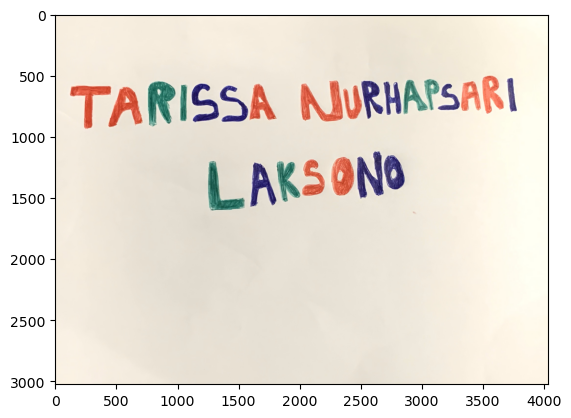

In [6]:
plt.imshow(img)

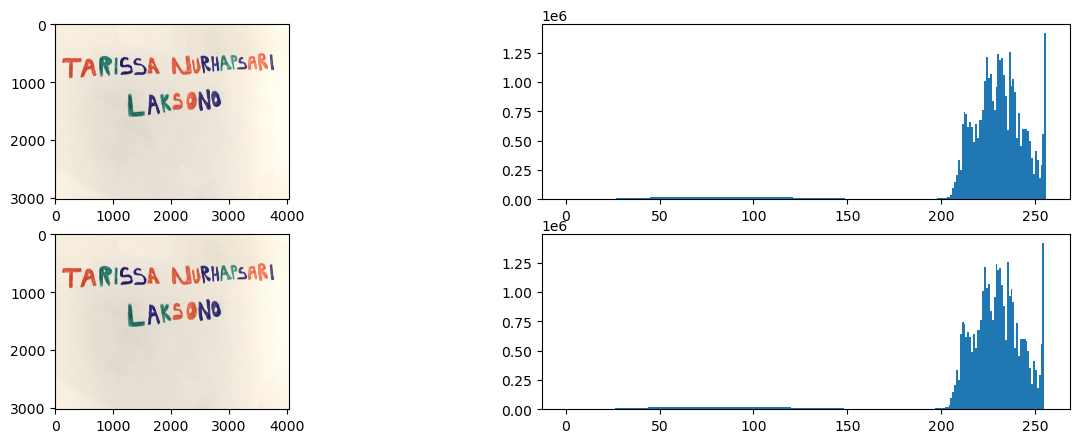

In [7]:
alpa = 1
beta = 255

citra_gabungan = np.zeros((baris, kolom, 3))

for x in range (baris) :
    for y in range (kolom) :
        gcx = (img[x, y] * alpa) + beta
        citra_gabungan[x, y] = gcx

citra_gabungan = citra_gabungan.astype(np.uint8)

# menampilkan
fig, axs = plt.subplots(2, 2, figsize = (15, 5))
axs[0, 0].imshow(img)
axs[0, 1].hist(img.ravel(), 256, [0, 256])
axs[1, 0].imshow(citra_gabungan)
axs[1, 1].hist(citra_gabungan.ravel(), 256, [0, 256])
plt.show()

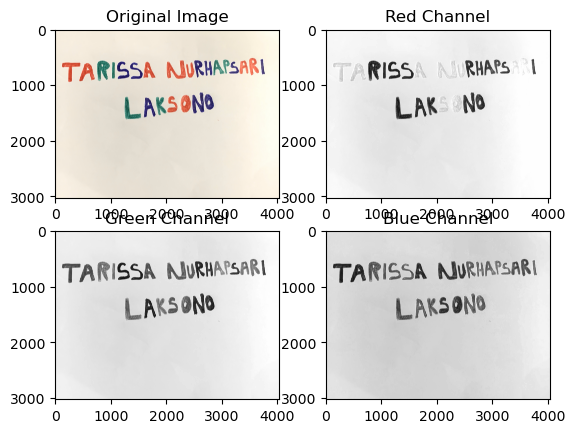

In [8]:
plt.subplot(2, 2, 1)
plt.imshow(citra_gabungan)
plt.title('Original Image')

# Display the red channel
plt.subplot(2, 2, 2)
plt.imshow(citra_gabungan[:,:,0], cmap="gray")
plt.title('Red Channel')

# Display the green channel
plt.subplot(2, 2, 3)
plt.imshow(citra_gabungan[:,:,1], cmap="gray")
plt.title('Green Channel')

# Display the blue channel
plt.subplot(2, 2, 4)
plt.imshow(citra_gabungan[:,:,2], cmap="gray")
plt.title('Blue Channel')

plt.show()

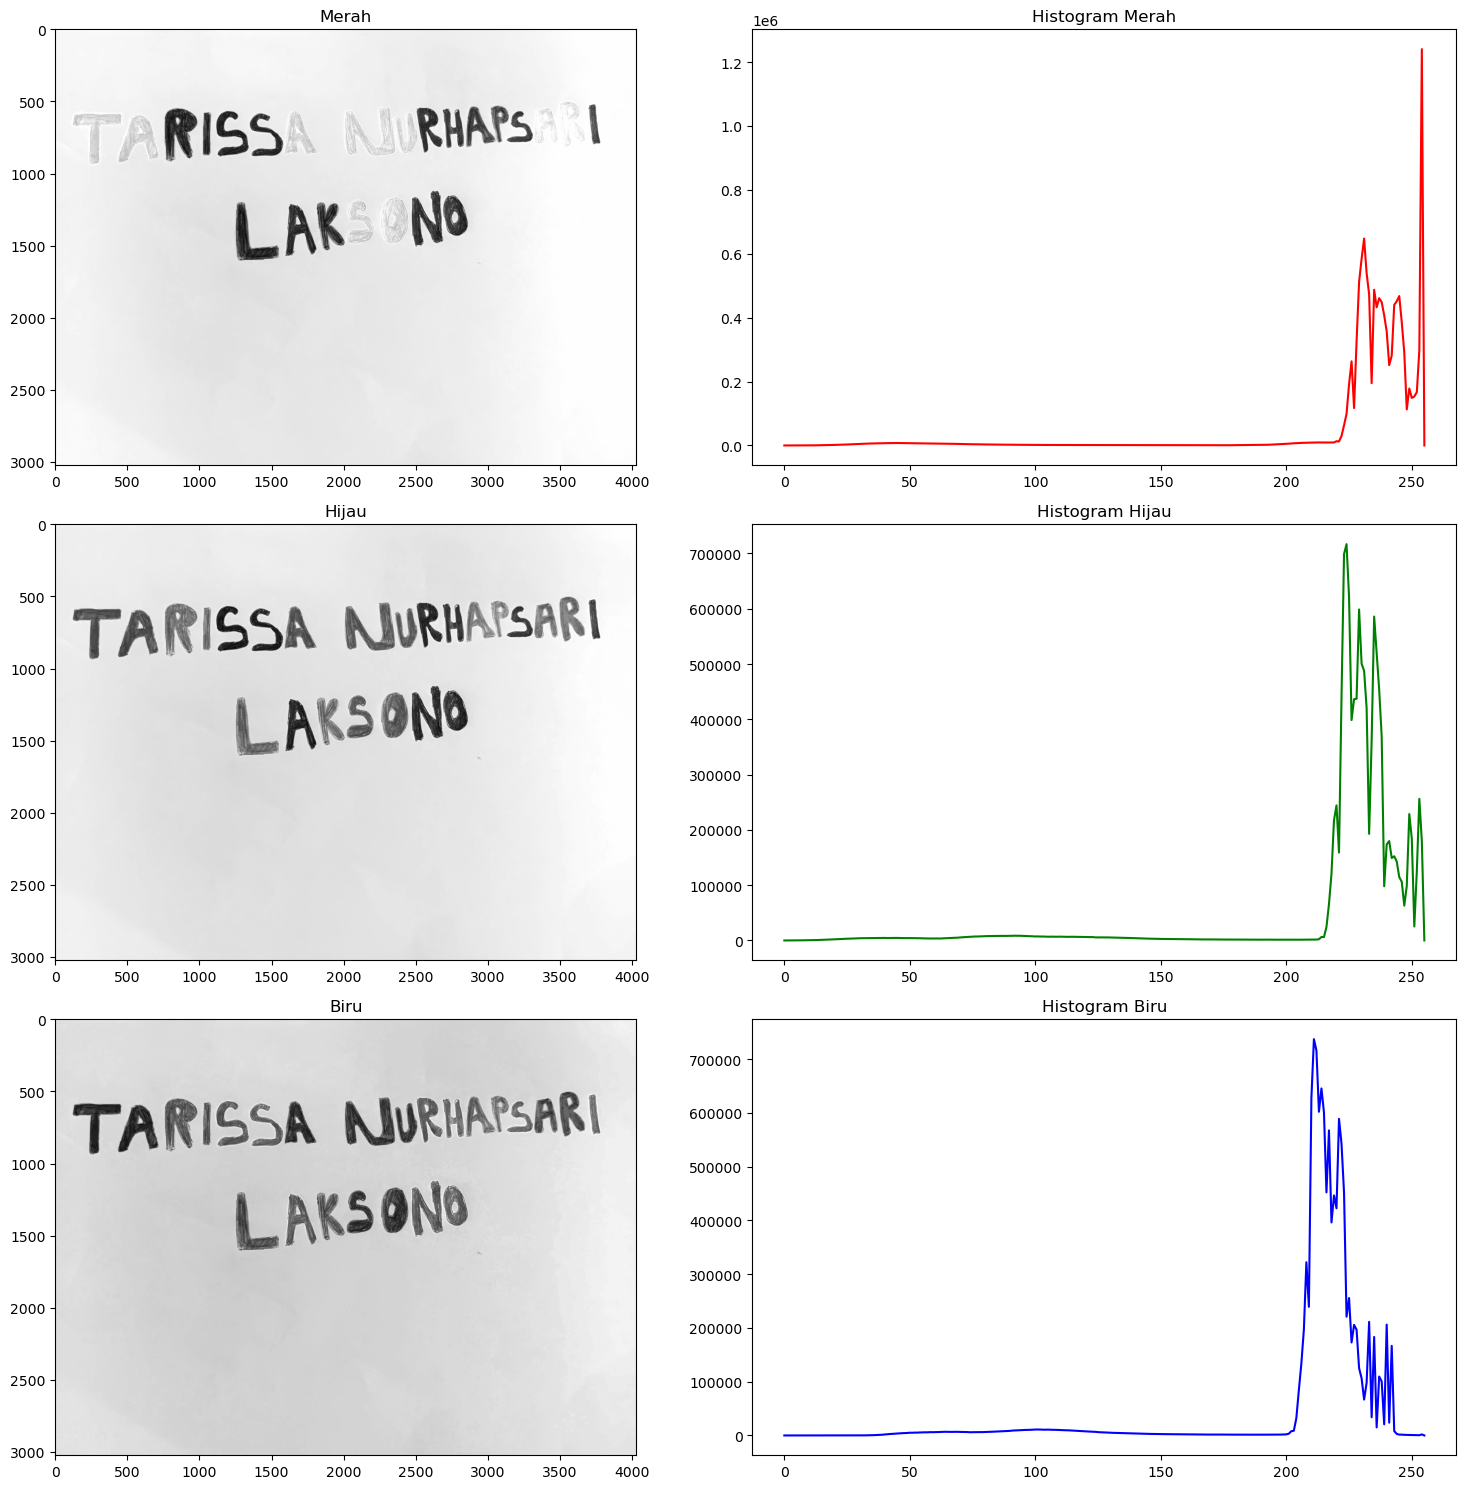

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Merah
merah = citra_gabungan[:, :, 0]
hist_merah = cv2.calcHist([merah], [0], None, [256], [0, 256])
axs[0, 0].imshow(merah, cmap='gray')
axs[0, 0].set_title('Merah')
axs[0, 1].plot(hist_merah, color='r')
axs[0, 1].set_title('Histogram Merah')

# Hijau
hijau = citra_gabungan[:, :, 1]
hist_hijau = cv2.calcHist([hijau], [0], None, [256], [0, 256])
axs[1, 0].imshow(hijau, cmap='gray')
axs[1, 0].set_title('Hijau')
axs[1, 1].plot(hist_hijau, color='g')
axs[1, 1].set_title('Histogram Hijau')

# Biru
biru = citra_gabungan[:, :, 2]
hist_biru = cv2.calcHist([biru], [0], None, [256], [0, 256])
axs[2, 0].imshow(biru, cmap='gray')
axs[2, 0].set_title('Biru')
axs[2, 1].plot(hist_biru, color='b')
axs[2, 1].set_title('Histogram Biru')

plt.tight_layout()
plt.show()


# 2.Membuat ambang batas citra

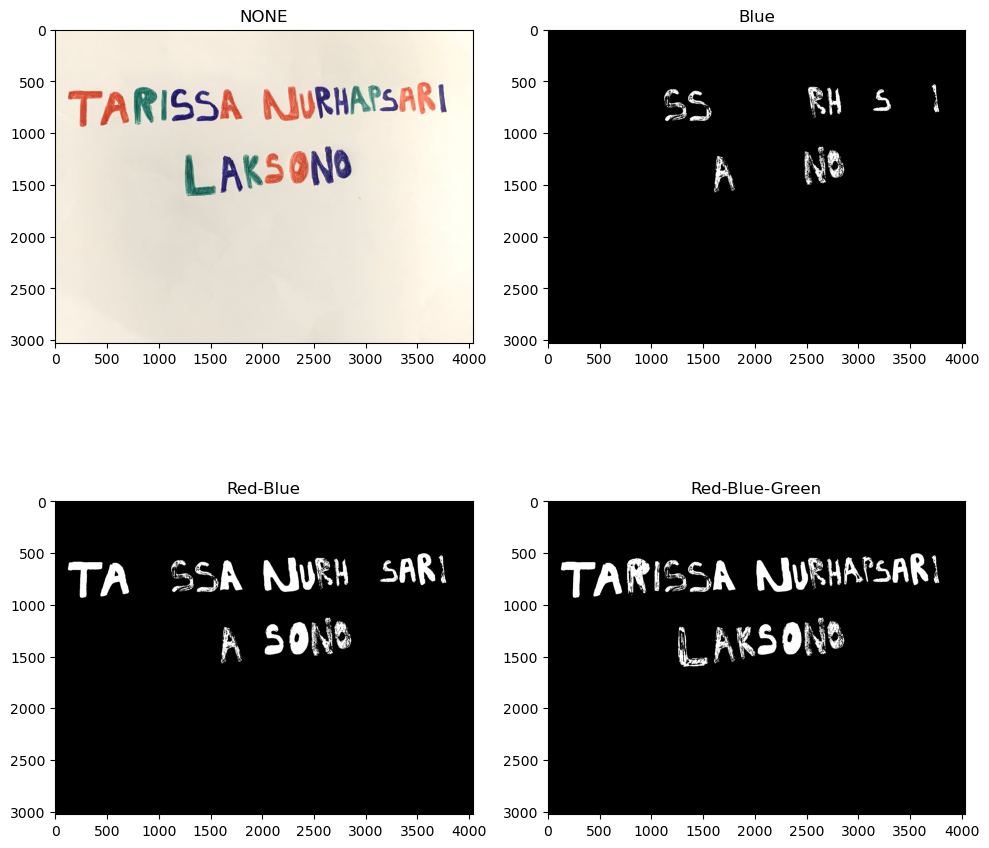

In [10]:
# Membaca gambar
color_image = cv2.imread('uts.jpg')

# Konversi citra ke dalam ruang warna HSV
hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

# Definisikan rentang warna untuk setiap warna
lower_blue = np.array([90, 100, 100])
upper_blue = np.array([130, 255, 255])

lower_green = np.array([50, 100, 100])
upper_green = np.array([90, 255, 255])

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Deteksi warna biru
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)
# Deteksi warna hijau
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
# Deteksi warna merah
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_red = mask_red1 | mask_red2  # Menggabungkan menggunakan operasi logika numpy

# Plot hasil
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Gambar 1: Tidak ada warna
axs[0, 0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('NONE')
axs[0, 0].axis('on')

# Gambar 2: Warna biru
axs[0, 1].imshow(mask_blue, cmap='gray')
axs[0, 1].set_title('Blue')
axs[0, 1].axis('on')

# Gambar 3: Warna merah dan biru
red_blue_combined = np.maximum(mask_red, mask_blue)
axs[1, 0].imshow(red_blue_combined, cmap='gray')
axs[1, 0].set_title('Red-Blue')
axs[1, 0].axis('on')

# Gambar 4: Warna merah, hijau, dan biru
all_combined = np.maximum.reduce([mask_red, mask_blue, mask_green])
axs[1, 1].imshow(all_combined, cmap='gray')
axs[1, 1].set_title('Red-Blue-Green')
axs[1, 1].axis('on')

# Menampilkan plot
plt.tight_layout()
plt.show()